# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
#for i in range(2000):
#    action = np.random.randint(action_size)
#    env_info = env.step(action)[brain_name]
#    print(env_info.vector_observations[0])
state = env_info.vector_observations[0]
#state = env_info.visual_observations
print('States look like:', state)
state_size = len(state)
#print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]


### 3. Training Agent

In the next code cell, the Agent is trained with the algorithm of DQN.



In [5]:
import torch 
from collections import deque #for the scores list
import matplotlib.pyplot as plt
from agent import DQN_agent
from time import time
%matplotlib inline

agent = DQN_agent(state_size = state_size, action_size = action_size, seed = 0)


Episode: 0	AverageScores: 0.00. Time/episode: 0.89
Episode: 100	AverageScores: 1.95. Time/episode: 0.75
Episode: 200	AverageScores: 6.72. Time/episode: 0.71
Episode: 300	AverageScores: 10.26. Time/episode: 0.72
Episode: 400	AverageScores: 12.17. Time/episode: 0.72
The algorithm is solved in : 420 and average is: 8.10


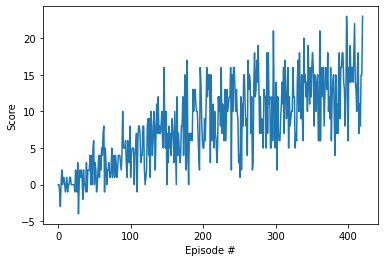

In [6]:
def DQN_training(env, episode_num = 2000, max_time = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.99):
    scores = []
    scores_windows = deque(maxlen = 100)
    eps = eps_start
    is_solved = False
    eps_solved = 0
    for episode in range(episode_num):
        start_time = time()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0 # initialize the score
        for t in range(max_time):
            #action = np.random.randint(action_size)        # select an action
            
            action = agent.act(state, eps)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            
            agent.step(state, action, reward, next_state, done) #update the parameter
            
            #print(stop_time - start_time)
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores.append(score)
        scores_windows.append(score)
        eps = max(eps*eps_decay, eps_end)
        
        ends = '' if not (episode % 100 == 0) else '\n'
        stop_time = time()
        delta_time = stop_time - start_time
        print('\rEpisode: {}\tAverageScores: {:.2f}. Time/episode: {:.2f}'.format(episode, np.mean(scores_windows),delta_time), end = ends )
        if(np.mean(scores_windows)>= 13.0 and not is_solved): #Terminated condition
            torch.save(agent.qnetwork_local.state_dict(), 'Checkpoint_DQN.pth')
            eps_solved = episode
            is_solved = True
            break
    print('\rThe algorithm is solved in : {} and average is: {:.2f}'.format(eps_solved, np.mean(scores)))    
    return scores
    
scores = DQN_training(env)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#print("Score: {}".format(score))

When finished, you can close the environment.

### 4. Testing 

Test the agent with built and trained DQN network

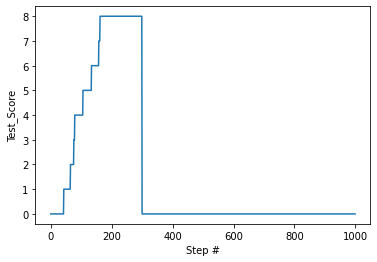

In [12]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
test_score = 0                                          # initialize the score
testing_steps = 1000
test_scores = np.zeros(testing_steps)
for i in range(testing_steps):
    action = action = agent.act(state)      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    test_score += reward                           # update the score
    test_scores[i] = test_score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break

#print("Score: {}".format(score))
# plot the scores
fig2 = plt.figure()
ax = fig2.add_subplot(111)
plt.plot(np.arange(testing_steps), test_scores)
plt.ylabel('Test_Score')
plt.xlabel('Step #')
plt.show()

In [ ]:
env.close()